In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
def get_dataset(filename):
    return pd.read_csv(f'data_cleaning/{filename}.csv')

In [138]:
df = get_dataset('apples_cleaned')

In [139]:
df.head()

,Variety,Class,Size,Package,Unit,Price,Total Sales,Sales Quantity,Closing Stock,Market,variety_labeled,class_labeled,size_labeled,package_labeled,market_labeled,kg_price
0,BRAEBURN,CLASS 2,UNDER SIZE,DOMPLE JUMBLE,9,70,70,1,66,BLO,0,0,0,0,0,7.78
1,CRIPPS PINK,CLASS 1,EXTRA LARGE,CARTON,18,208,1250,6,78,BLO,1,1,1,1,0,11.56
2,CRIPPS PINK,CLASS 1,LARGE,CARTON,18,198,1590,8,144,BLO,1,1,2,1,0,11.00
3,CRIPPS PINK,CLASS 1,SMALL,ECONOMIC PACK,12,134,4288,32,149,BLO,1,1,3,2,0,11.17
4,CRIPPS PINK,CLASS 2,LARGE,DOMPLE JUMBLE,10,64,1604,25,22,BLO,1,0,2,0,0,6.40


In [140]:
df.describe()

,Unit,Price,Total Sales,Sales Quantity,Closing Stock,variety_labeled,class_labeled,size_labeled,package_labeled,market_labeled,kg_price
count,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000,27895.000000
mean,12.648575,126.143359,8303.110091,84.792508,390.873920,5.510486,0.557340,2.979351,1.122065,4.775049,9.518920
std,4.824087,199.468802,15596.059693,163.350959,710.721741,3.760460,0.497215,1.180615,0.978095,3.460868,9.419549
min,1.000000,1.000000,6.000000,-470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000
25%,9.000000,68.000000,650.000000,7.000000,42.000000,3.000000,0.000000,2.000000,0.000000,1.000000,7.000000
50%,12.000000,100.000000,2830.000000,28.000000,153.000000,5.000000,1.000000,3.000000,1.000000,4.000000,8.330000
75%,18.000000,155.000000,8960.000000,91.000000,424.000000,8.000000,1.000000,4.000000,2.000000,9.000000,10.060000
max,40.000000,3250.000000,299000.000000,2600.000000,8945.000000,19.000000,2.000000,6.000000,6.000000,10.000000,200.000000


In [141]:
df.columns

Index(['Variety', 'Class', 'Size', 'Package', 'Unit', 'Price', 'Total Sales',
       'Sales Quantity', 'Closing Stock', 'Market', 'variety_labeled',
       'class_labeled', 'size_labeled', 'package_labeled', 'market_labeled',
       'kg_price'],
      dtype='object')

<Axes: >

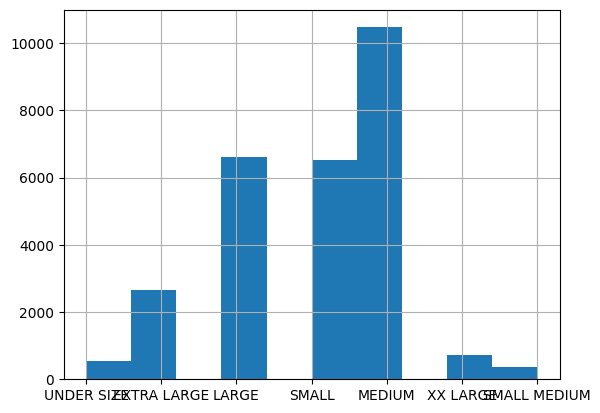

In [142]:
df.Size.hist()

<Axes: >

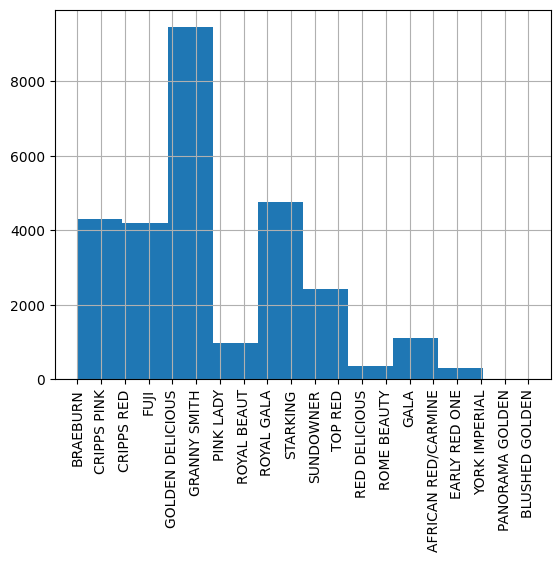

In [143]:
df.Variety.hist(xrot = 90)

<Axes: >

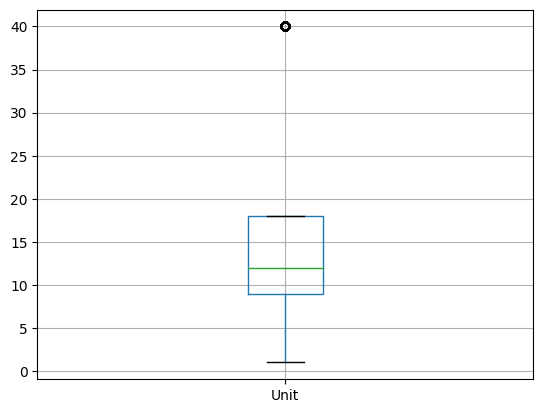

In [144]:
df.boxplot(column = ['Unit'])

<Axes: >

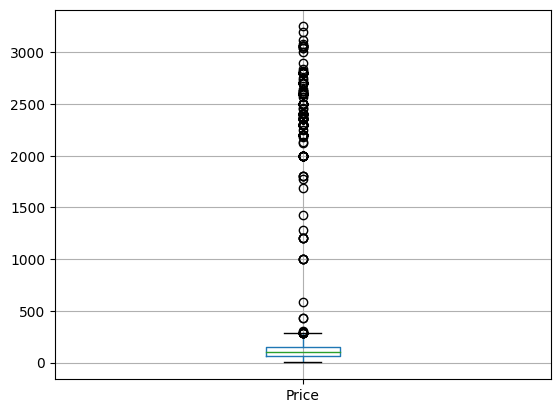

In [145]:
df.boxplot(column=['Price'])

<Axes: >

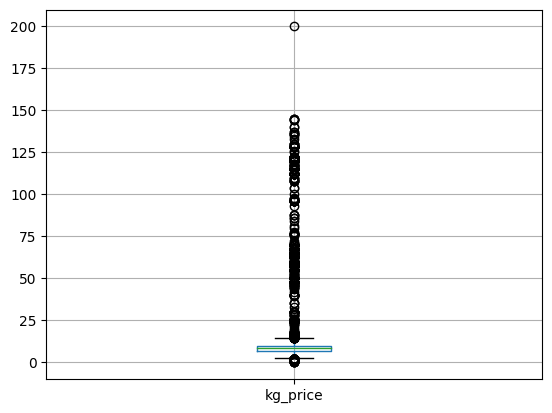

In [146]:
df.boxplot(column=['kg_price'])

In [147]:
df.columns

Index(['Variety', 'Class', 'Size', 'Package', 'Unit', 'Price', 'Total Sales',
       'Sales Quantity', 'Closing Stock', 'Market', 'variety_labeled',
       'class_labeled', 'size_labeled', 'package_labeled', 'market_labeled',
       'kg_price'],
      dtype='object')

In [148]:
corr = df[['Unit','Price','Total Sales','Sales Quantity','Closing Stock','kg_price']].corr()
print(corr)

                    Unit     Price  Total Sales  Sales Quantity  \
Unit            1.000000  0.638799     0.060963       -0.166685   
Price           0.638799  1.000000     0.054900       -0.074862   
Total Sales     0.060963  0.054900     1.000000        0.824828   
Sales Quantity -0.166685 -0.074862     0.824828        1.000000   
Closing Stock  -0.043205 -0.051112     0.377706        0.416514   
kg_price        0.126364  0.496618     0.056371       -0.024637   

                Closing Stock  kg_price  
Unit                -0.043205  0.126364  
Price               -0.051112  0.496618  
Total Sales          0.377706  0.056371  
Sales Quantity       0.416514 -0.024637  
Closing Stock        1.000000 -0.037300  
kg_price            -0.037300  1.000000  


<Axes: >

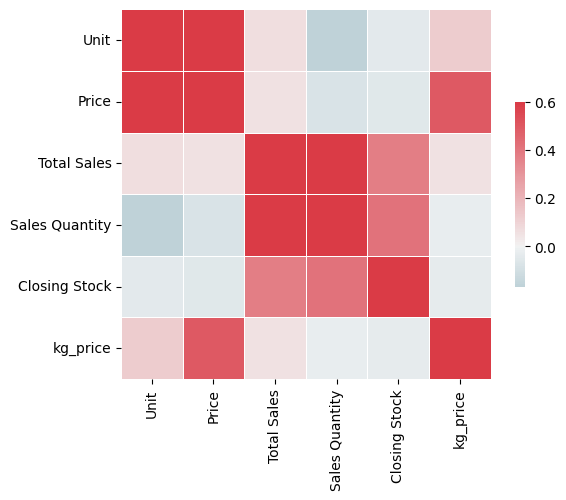

In [192]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,vmax=0.6,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [150]:
df_cat = df[['Variety',
       'Class', 'Size', 'Package', 'Market']]

graph for Variety: total = 20


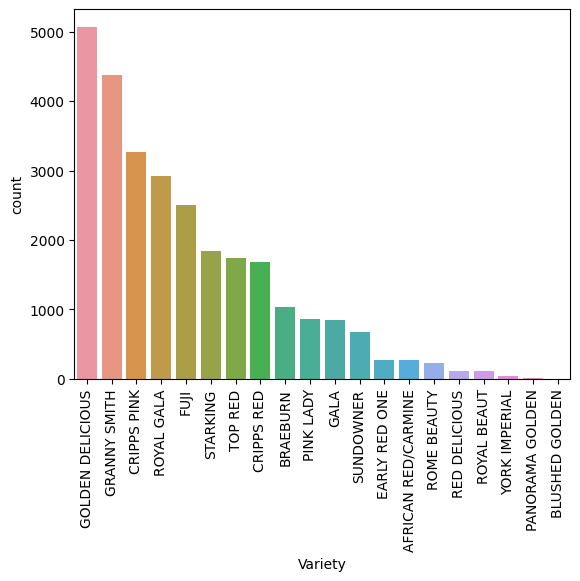

graph for Class: total = 3


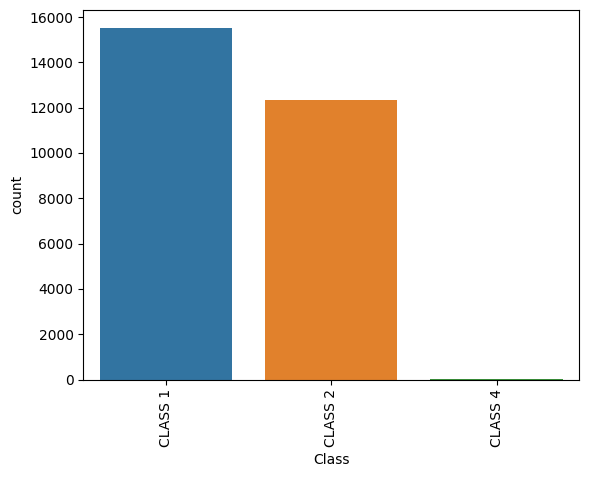

graph for Size: total = 7


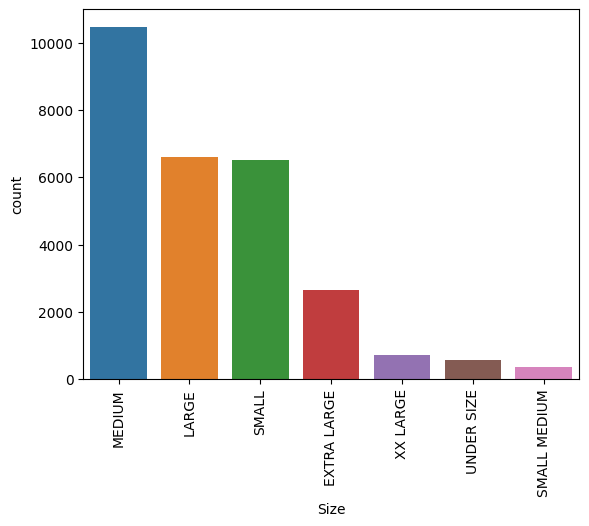

graph for Package: total = 7


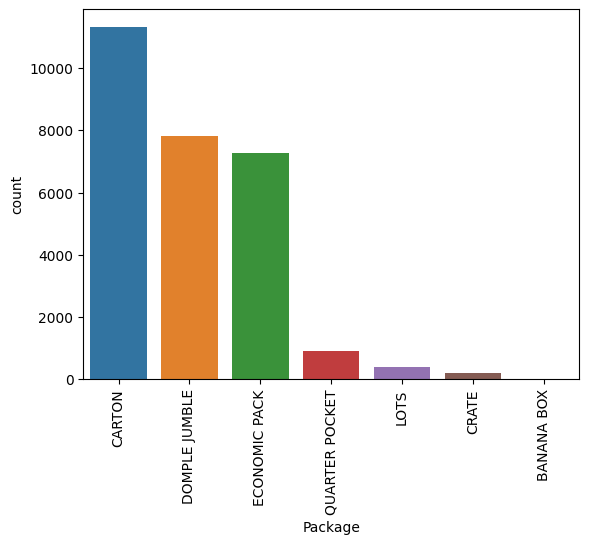

graph for Market: total = 11


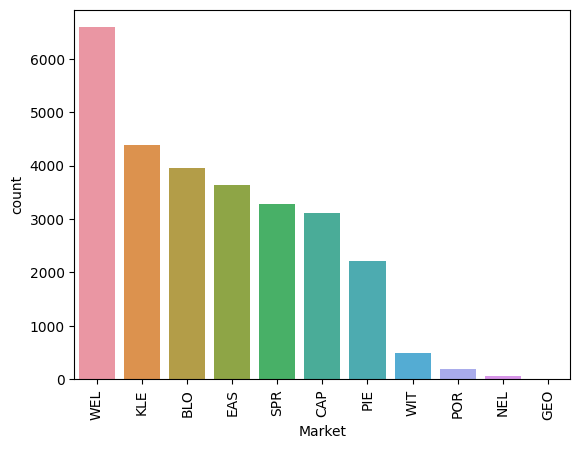

In [151]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [154]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index=['Market','Class','Size'],values="kg_price")


kg_price
Market Class   Size                   
BLO    CLASS 1 EXTRA LARGE   10.311552
               LARGE          9.598851
               MEDIUM         9.181131
               SMALL          8.839517
       CLASS 2 EXTRA LARGE    6.565000
               LARGE          7.801696
               MEDIUM         7.260673
               SMALL          6.131637
               UNDER SIZE     6.994309
CAP    CLASS 1 EXTRA LARGE   10.528514
               LARGE         10.127530
               MEDIUM         9.039973
               SMALL          7.283881
               UNDER SIZE     8.011639
       CLASS 2 EXTRA LARGE    6.971346
               LARGE          5.503082
               MEDIUM         5.948660
               SMALL          4.476588
EAS    CLASS 1 EXTRA LARGE    9.800565
               LARGE          9.708171
               MEDIUM         9.608333
               SMALL         16.919308
               UNDER SIZE     9.000000
       CLASS 2 EXTRA LARGE    7.494286
               LARGE          7.861912
               MEDIUM         8.061811
               SMALL          6.542924
               UNDER SIZE     5.560000
GEO    CLASS 1 MEDIUM         8.332000
KLE    CLASS 1 MEDIUM        20.321877
               XX LARGE      18.361515
       CLASS 2 EXTRA LARGE    7.339024
               LARGE          7.351139
               MEDIUM         9.858774
               SMALL          7.596749
               SMALL MEDIUM   7.390650
               UNDER SIZE     7.365250
               XX LARGE      13.840815
       CLASS 4 LARGE          7.670000
               MEDIUM         8.666000
NEL    CLASS 1 MEDIUM        38.290000
               SMALL          7.585385
               UNDER SIZE     7.098182
PIE    CLASS 1 LARGE         10.473304
               MEDIUM        10.749220
               SMALL         15.854912
               UNDER SIZE     8.755789
       CLASS 2 LARGE          8.461333
               MEDIUM         7.715748
               SMALL          7.167000
               UNDER SIZE     7.765405
POR    CLASS 1 LARGE          7.711875
               MEDIUM         6.896905
               SMALL          8.450870
       CLASS 2 MEDIUM         1.952917
               SMALL         20.000000
SPR    CLASS 1 EXTRA LARGE   10.160728
               LARGE         10.583612
               MEDIUM         9.815911
               SMALL          7.550256
       CLASS 2 EXTRA LARGE    7.324182
               LARGE          6.952050
               MEDIUM         6.946949
               SMALL          6.677456
               UNDER SIZE     6.209018
WEL    CLASS 1 EXTRA LARGE    9.648927
               LARGE         10.460814
               MEDIUM         9.541850
               SMALL          8.886977
               UNDER SIZE     6.778000
       CLASS 2 EXTRA LARGE    6.247797
               LARGE          7.041367
               MEDIUM         6.666900
               SMALL          6.248364
               UNDER SIZE     5.890633
WIT    CLASS 1 LARGE          9.973297
               MEDIUM         9.030606
               SMALL         10.134000
       CLASS 2 LARGE          9.690625
               MEDIUM         8.043953
               SMALL          8.733636

In [153]:
pd.pivot_table(df,index='Variety',values="kg_price").sort_values('kg_price',ascending=False)

,kg_price
Variety,
BRAEBURN,22.517265
TOP RED,10.137871
ROYAL GALA,10.098897
GOLDEN DELICIOUS,9.781150
STARKING,9.761472
CRIPPS RED,9.412091
GALA,9.199810
SUNDOWNER,9.047738
AFRICAN RED/CARMINE,9.007015


In [182]:
df_pivots = df[['Variety', 'Class', 'Size', 'Package', 'Unit',
        'Market','kg_price']]

In [183]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='kg_price').sort_values('kg_price',ascending=False))
    print("----------------------------------")

Variety
                      kg_price
Variety                       
BRAEBURN             22.517265
TOP RED              10.137871
ROYAL GALA           10.098897
GOLDEN DELICIOUS      9.781150
STARKING              9.761472
CRIPPS RED            9.412091
GALA                  9.199810
SUNDOWNER             9.047738
AFRICAN RED/CARMINE   9.007015
ROYAL BEAUT           8.962252
CRIPPS PINK           8.814767
FUJI                  8.389552
BLUSHED GOLDEN        8.332000
EARLY RED ONE         8.116097
RED DELICIOUS         7.775798
PINK LADY             7.551986
GRANNY SMITH          7.478765
YORK IMPERIAL         7.302857
ROME BEAUTY           6.701078
PANORAMA GOLDEN       4.284286
----------------------------------
Class
          kg_price
Class             
CLASS 1  11.282755
CLASS 4   8.381429
CLASS 2   7.302029
----------------------------------
Size
               kg_price
Size                   
XX LARGE      17.509148
EXTRA LARGE    9.585968
SMALL          9.441857
MEDIUM        

ValueError: Grouper for 'kg_price' not 1-dimensional

In [184]:
pd.pivot_table(df_pivots,index="Variety",columns="Size",values="kg_price")

Size,EXTRA LARGE,LARGE,MEDIUM,SMALL,SMALL MEDIUM,UNDER SIZE,XX LARGE
Variety,,,,,,,
AFRICAN RED/CARMINE,7.745417,8.176410,8.770198,12.979474,NaN,NaN,8.443333
BLUSHED GOLDEN,NaN,NaN,8.332000,NaN,NaN,NaN,NaN
BRAEBURN,7.541220,8.399164,31.882745,7.772143,NaN,9.570000,110.076923
CRIPPS PINK,9.110160,9.011183,8.932113,8.318222,7.498788,6.320000,9.603617
CRIPPS RED,9.408372,9.705099,9.704876,8.609972,6.029355,8.046818,12.003778
EARLY RED ONE,10.872647,8.581111,7.787009,7.055333,6.818750,NaN,4.170000
FUJI,8.700753,8.834604,8.171387,8.380032,8.468378,6.960294,8.370476
GALA,10.057097,9.909050,8.466327,9.619679,8.744286,9.110000,9.807183
GOLDEN DELICIOUS,11.060636,9.841657,8.885205,10.784834,7.584179,6.256947,11.773488
